<a href="https://colab.research.google.com/github/Hashhhhhhhh/Quantum-Computing-using-Qiskit/blob/main/QSVM_using_pennylane.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here we are considering a matrix of 3x5 i.e., 5 features and 3 observables for each feature.

In [60]:
import numpy as np
X = np.array([[0.1, 0.3, 0.5],
              [0.2, 0.1, 0.4],
              [0.4, 0.7, 0.2],
              [0.9, 0.6, 0.8],
              [0.7, 0.9, 0.3]])
# Dummy labels for illustration (2 classes)
y = np.array([0, 0, 1, 1, 1])


In [61]:
!pip install pennylane

The kernel matrix you get from construct_kernel_matrix is the quantum kernel matrix computed after encoding the data points into quantum states with correlations (entanglement) introduced by the quantum feature map. The kernel matrix elements measure the overlap (similarity) between these entangled quantum states.

In [62]:
import pennylane as qml
from pennylane import numpy as np

n_qubits = 3
dev = qml.device("default.qubit", wires=n_qubits)

def feature_map(x):
    for i in range(n_qubits):
        qml.RY(x[i] * np.pi, wires=i)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    for i in range(n_qubits):
        qml.RY(x[i] * np.pi / 2, wires=i)

@qml.qnode(dev)
def kernel_circuit(x, y):
    feature_map(x)
    qml.adjoint(feature_map)(y)
    # Return expectation value of the projector onto |000>
    return qml.expval(qml.Projector(np.zeros(n_qubits), wires=range(n_qubits)))

# Sample usage with your data
X = np.array([
    [0.1, 0.3, 0.5],
    [0.2, 0.1, 0.4],
    [0.4, 0.7, 0.2],
    [0.9, 0.6, 0.8],
    [0.7, 0.9, 0.3]
])

def construct_kernel_matrix(X):
    n = len(X)
    kernel_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            kernel_matrix[i, j] = kernel_circuit(X[i], X[j])
    return kernel_matrix

K = construct_kernel_matrix(X)
print("Quantum kernel matrix:\n", K)

from sklearn.svm import SVC

# Initialize the SVC classifier with a precomputed kernel
svc = SVC(kernel='precomputed')

# Train the classifier using the constructed kernel matrix and labels (assuming 'y' is defined)
y = np.array([0, 0, 1, 1, 1]) # Make sure y is defined or loaded
svc.fit(K, y)

print("\nSVC classifier trained successfully!")

Quantum kernel matrix:
 [[1.         0.72118853 0.13412747 0.05070486 0.03030693]
 [0.72118853 1.         0.05199311 0.00710148 0.01818903]
 [0.13412747 0.05199311 1.         0.01881182 0.53040472]
 [0.05070486 0.00710148 0.01881182 1.         0.20259647]
 [0.03030693 0.01818903 0.53040472 0.20259647 1.        ]]

SVC classifier trained successfully!


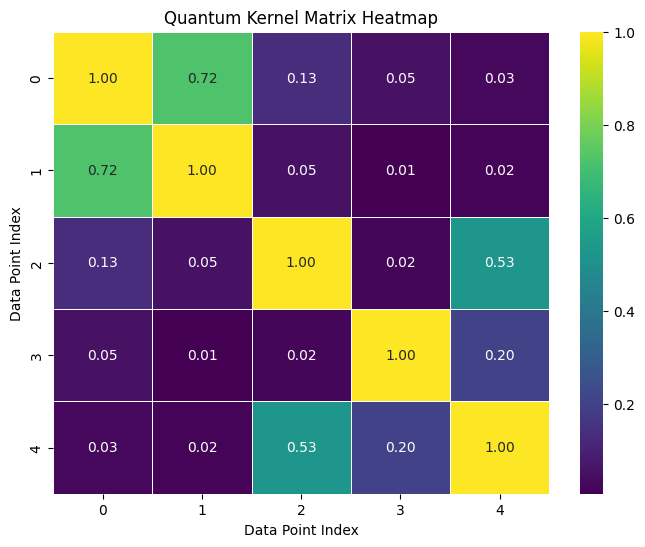

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(K, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Quantum Kernel Matrix Heatmap')
plt.xlabel('Data Point Index')
plt.ylabel('Data Point Index')
plt.show()

### Data Visualization using Kernel PCA on the Quantum Kernel

We will use Kernel PCA to reduce the dimensionality of the data based on the quantum kernel matrix `K` and visualize the data points in the reduced 2-dimensional space, colored by their class labels.

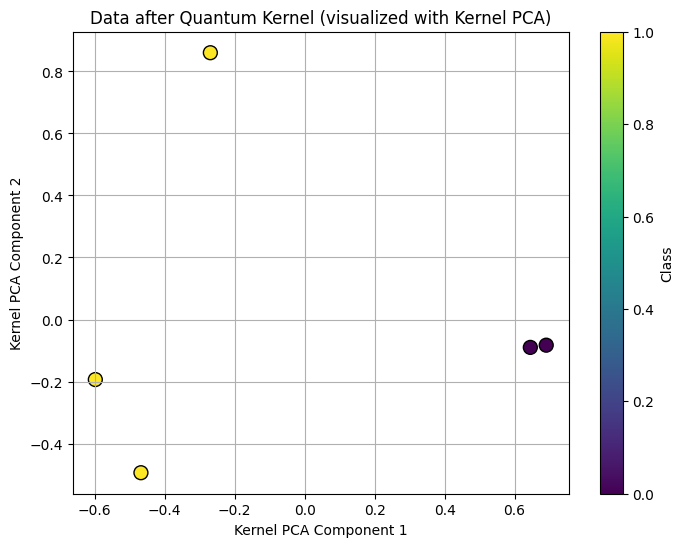

In [64]:
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt
# Apply Kernel PCA
kpca = KernelPCA(n_components=2, kernel='precomputed')
X_kpca = kpca.fit_transform(K)

# Plot the transformed data
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y, cmap='viridis', s=100, edgecolors='k')
plt.title('Data after Quantum Kernel (visualized with Kernel PCA)')
plt.xlabel('Kernel PCA Component 1')
plt.ylabel('Kernel PCA Component 2')
plt.colorbar(scatter, label='Class')
plt.grid(True)
plt.show()